In [90]:
import os
import numpy as np
import pandas as pd

In [91]:
dtype_dict = {'STATE_CODE_001': int,
 'STRUCTURE_NUMBER_008': str,
 'SERVICE_LEVEL_005C': int,
 'DIRECTION_005E': int,
 'FUNCTIONAL_CLASS_026': int,
 'YEAR_BUILT_027': int,
 'TRAFFIC_LANES_ON_028A': int,
 'TRAFFIC_LANES_UND_028B': int,
 'ADT_029': float,
 'MEDIAN_CODE_033': int,
 'DEGREES_SKEW_034': float,
 'STRUCTURE_FLARED_035': int,
 'OPEN_CLOSED_POSTED_041': str,
 'SERVICE_ON_042A': int,
 'SERVICE_UND_042B': int,
 'STRUCTURE_KIND_043A': int,
 'STRUCTURE_TYPE_043B': int,
 'APPR_KIND_044A': int,
 'APPR_TYPE_044B': int,
 'MAIN_UNIT_SPANS_045': float,
 'APPR_SPANS_046': float,
 'MAX_SPAN_LEN_MT_048': float,
 'STRUCTURE_LEN_MT_049': float,
 'DECK_COND_058': int,
 'SUPERSTRUCTURE_COND_059': int,
 'SUBSTRUCTURE_COND_060': int,
 'CHANNEL_COND_061': int,
 'CULVERT_COND_062': int,
 'OPERATING_RATING_064': float,
 'INVENTORY_RATING_066': float,
 'STRUCTURAL_EVAL_067': int,
 'DECK_GEOMETRY_EVAL_068': int,
 'UNDCLRENCE_EVAL_069': int,
 'WATERWAY_EVAL_071': int,
 'APPR_ROAD_EVAL_072': int,
 'DATE_OF_INSPECT_090': float,
 'INSPECT_FREQ_MONTHS_091': float,
 'TEMP_STRUCTURE_103': str,
 'YEAR_RECONSTRUCTED_106': float,
 'DECK_STRUCTURE_TYPE_107': int,
 'SURFACE_TYPE_108A': int,
 'MEMBRANE_TYPE_108B': int,
 'DECK_PROTECTION_108C': int,
 'PERCENT_ADT_TRUCK_109': float,
 'SCOUR_CRITICAL_113': str,
 'SUFFICIENCY_RATING': float,
 'YEAR': int,
 'FRACTURE_FLAG_092AF': int,
 'UNDWATER_FLAG_092BF': int,
 'SPEC_FLAG_092AF': int
}

In [92]:
# load data into pandas df
file_path = "D:/Scripts/bridges_project/data/masterBridges7.csv"

mylist = []

for chunk in pd.read_csv(file_path, dtype= dtype_dict, chunksize=1000):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
del mylist

In [ ]:
big_data.head()

In [ ]:
big_data.info()

# First Cleaning Pass w/masterBridges5.csv File

In [ ]:
# # for OPEN_CLOSED_POSTED_041
# # fix mixed cases (handful of lower cases)
# big_data['OPEN_CLOSED_POSTED_041'] = big_data['OPEN_CLOSED_POSTED_041'].apply(lambda x: str(x).upper())
# big_data['OPEN_CLOSED_POSTED_041'].value_counts()

In [ ]:
# # for INSPECT_FREQ_MONTHS_091
# # fill missing values in 'INSPECT_FREQ_MONTHS_091' via ffill method
# big_data['INSPECT_FREQ_MONTHS_091'] = big_data['INSPECT_FREQ_MONTHS_091'].ffill()

In [ ]:
# big_data['INSPECT_FREQ_MONTHS_091'].isna().sum()

In [ ]:
# # for SCOUR_CRITICAL_113
# # convert T to 10
# # convert U to 15
# # convert N to -1
# # convert dtype to int
# big_data = big_data.replace({'SCOUR_CRITICAL_113': {'T': 10, 'U': 15, 'N': -1}})

In [ ]:
# big_data['SCOUR_CRITICAL_113'].value_counts()

In [ ]:
# # for FRACTURE_092A
# # create binary flag col based off of y or n indicator
# # drop original col
# big_data['FRACTURE_FLAG_092AF'] = np.where(big_data['FRACTURE_092A'].str.startswith('Y') | big_data['FRACTURE_092A'].str.startswith('y'), 1, 0)

In [ ]:
# big_data['FRACTURE_FLAG_092AF'].value_counts()

In [ ]:
# big_data.drop(columns= ['FRACTURE_092A'], inplace= True)

In [ ]:
# # for UNDWATER_LOOK_SEE_092B
# # create binary flag col based off of y or n indicator
# # drop orginal col
# big_data['UNDWATER_FLAG_092BF'] = np.where(big_data['UNDWATER_LOOK_SEE_092B'].str.startswith('Y') | big_data['UNDWATER_LOOK_SEE_092B'].str.startswith('y'), 1, 0)

In [ ]:
# big_data['UNDWATER_FLAG_092BF'].isna().sum()

In [ ]:
# big_data.drop(columns= ['UNDWATER_LOOK_SEE_092B'], inplace= True)

In [ ]:
# # for SPEC_INSPECT_092C
# # create binary flag col based off of y or n indicator
# # drop original col
# big_data['SPEC_FLAG_092AF'] = np.where(big_data['SPEC_INSPECT_092C'].str.startswith('Y') | big_data['SPEC_INSPECT_092C'].str.startswith('y'), 1, 0)

In [ ]:
# big_data['SPEC_FLAG_092AF'].value_counts()

In [ ]:
# big_data.drop(columns= ['SPEC_INSPECT_092C'], inplace= True)

In [ ]:
# # replace * in the following columns with value of 333, these rows will be dropped after read in again as an int dtype
# cols_flag = ['STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068', 'UNDCLRENCE_EVAL_069']
# for col in cols_flag:
#     big_data = big_data.replace({col: {'*': 333}})

In [ ]:
# big_data['STRUCTURAL_EVAL_067'].value_counts()

In [ ]:
#save new df as csv, just in case
save_dir = "D:/Scripts/bridges_project/data"
save_name = "masterBridges6.csv"
save_path = os.path.join(save_dir, save_name)
big_data.to_csv(save_path, index= False)

# Second Pass w/masterBridges6.csv File

In [4]:
# for PERCENT_ADT_TRUCK_109
# impute mean based off year and functional class (see below)
# big_data.groupby(['YEAR', 'FUNCTIONAL_CLASS_026'])[['PERCENT_ADT_TRUCK_109']].mean()
big_data['PERCENT_ADT_TRUCK_109'] = big_data.groupby(['YEAR', 'FUNCTIONAL_CLASS_026'])['PERCENT_ADT_TRUCK_109'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
big_data['DATE_OF_INSPECT_090'].value_counts()

In [5]:
# for DATE_OF_INSPECT_090
# create binary flag col based off of value or not
# drop original col
big_data['INSPECT_FLAG_090F'] = np.where(big_data['DATE_OF_INSPECT_090'] > 0, 1, 0)

In [ ]:
big_data['INSPECT_FLAG_090F'].value_counts()

In [6]:
big_data.drop(columns= ['DATE_OF_INSPECT_090'], inplace= True)

In [ ]:
 'STRUCTURAL_EVAL_067': int,
 'DECK_GEOMETRY_EVAL_068': int,
 'UNDCLRENCE_EVAL_069': int,

In [ ]:
big_data['STRUCTURAL_EVAL_067'].value_counts()

In [10]:
# drop rows that contain 333 (filled in for the *) for the following columns: STRUCTURAL_EVAL_067, DECK_GEOMETRY_EVAL_068, STRUCTURAL_EVAL_067
big_data = big_data.loc[big_data['STRUCTURAL_EVAL_067'] != 333]

In [12]:
big_data = big_data.loc[big_data['DECK_GEOMETRY_EVAL_068'] != 333]

In [13]:
big_data = big_data.loc[big_data['UNDCLRENCE_EVAL_069'] != 333]

In [ ]:
big_data.info()

In [18]:
# for YEAR_RECONSTRUCTED_106
# fill na with 0
# drop any row with a value greater than 2023
# think about how to use this feature to engineer bridge age feature for later
values = {'YEAR_RECONSTRUCTED_106': 0.0}
big_data = big_data.fillna(value= values)

In [21]:
big_data = big_data.loc[big_data['YEAR_RECONSTRUCTED_106'] < 2025.0]

In [ ]:
big_data.info()

In [26]:
# for YEAR_BUILT_027
# drop anything with less than four characters and anything greater than 2023
# think about using for feature engineering brige age (along w/year reconstructed)
big_data = big_data.loc[big_data['YEAR_BUILT_027'] < 2024.0]

In [27]:
big_data = big_data.loc[big_data['YEAR_BUILT_027'] > 1000]

In [31]:
#save new df as csv, just in case
save_dir = "D:/Scripts/bridges_project/data"
save_name = "masterBridges7.csv"
save_path = os.path.join(save_dir, save_name)
big_data.to_csv(save_path, index= False)

In [32]:
big_data.columns.tolist()

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'SERVICE_LEVEL_005C',
 'DIRECTION_005E',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'APPR_KIND_044A',
 'APPR_TYPE_044B',
 'MAIN_UNIT_SPANS_045',
 'APPR_SPANS_046',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060',
 'CHANNEL_COND_061',
 'CULVERT_COND_062',
 'OPERATING_RATING_064',
 'INVENTORY_RATING_066',
 'STRUCTURAL_EVAL_067',
 'DECK_GEOMETRY_EVAL_068',
 'UNDCLRENCE_EVAL_069',
 'WATERWAY_EVAL_071',
 'APPR_ROAD_EVAL_072',
 'INSPECT_FREQ_MONTHS_091',
 'YEAR_RECONSTRUCTED_106',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C',
 'PERCENT_ADT_TRUCK_109',
 'SCOUR_CRITICAL_113',
 'SUFFI

In [93]:
def getAge(row):
    if row['YEAR_RECONSTRUCTED_106'] == 0:
        age = row['YEAR'] - row['YEAR_BUILT_027']
    else:
        age = row['YEAR'] - row['YEAR_RECONSTRUCTED_106']

    return age
    
big_data['REL_BRIDGE_AGE'] = big_data.apply(getAge, axis= 1)

In [94]:
#save new df as csv, just in case
save_dir = "D:/Scripts/bridges_project/data"
save_name = "masterBridges8.csv"
save_path = os.path.join(save_dir, save_name)
big_data.to_csv(save_path, index= False)

In [ ]:
big_data.info()

# Some Quick Distribution Plots

In [ ]:
# check the following for distrubution
SERVICE_LEVEL_005C, FUNCTIONAL_CLASS_026, YEAR_BUILT_027, TRAFFIC_LANES_ON_028A, TRAFFIC_LANES_UND_028B, ADT_029, MEDIAN_CODE_033, STRUCTURE_FLARED_035,
SERVICE_ON_042A, SERVICE_UND_042B, STRUCTURE_KIND_043A, STRUCTURE_TYPE_043B, REL_BRIDGE_AGE, SUFFICIENCY_RATING

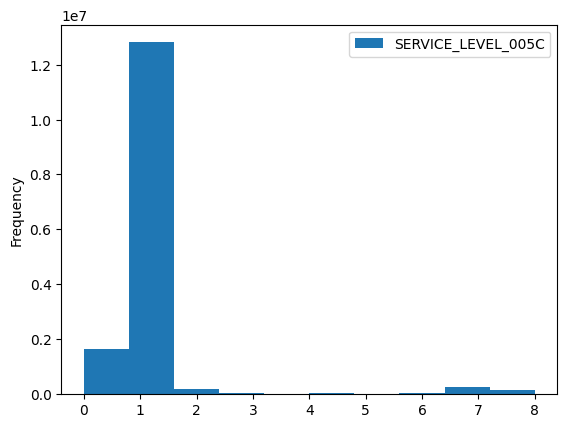

In [40]:
big_data.plot.hist(column= 'SERVICE_LEVEL_005C');

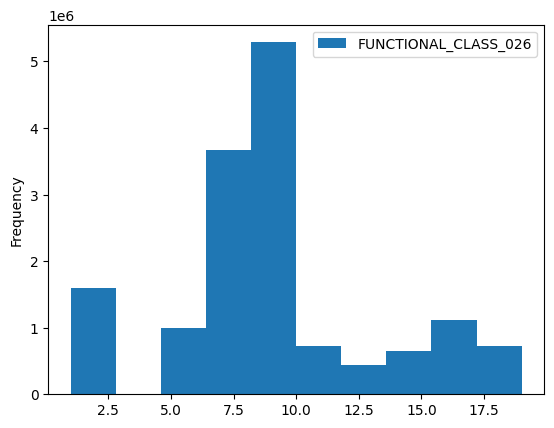

In [41]:
big_data.plot.hist(column= 'FUNCTIONAL_CLASS_026');

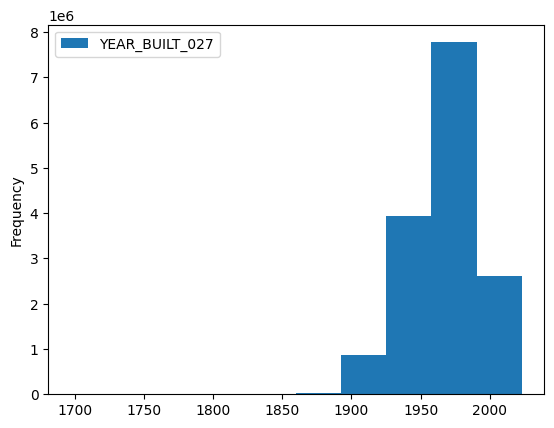

In [42]:
big_data.plot.hist(column= 'YEAR_BUILT_027');

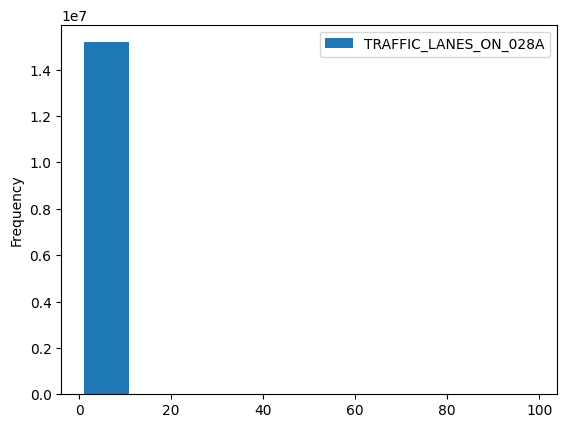

In [43]:
big_data.plot.hist(column= 'TRAFFIC_LANES_ON_028A');

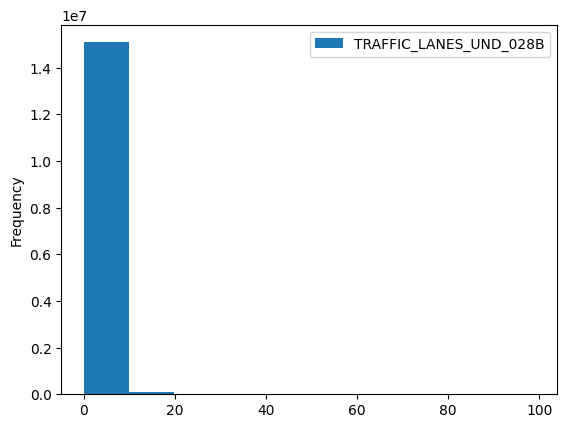

In [44]:
big_data.plot.hist(column= 'TRAFFIC_LANES_UND_028B');

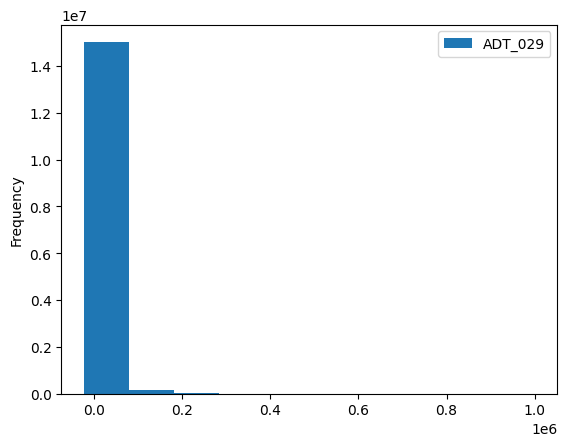

In [45]:
big_data.plot.hist(column= 'ADT_029');

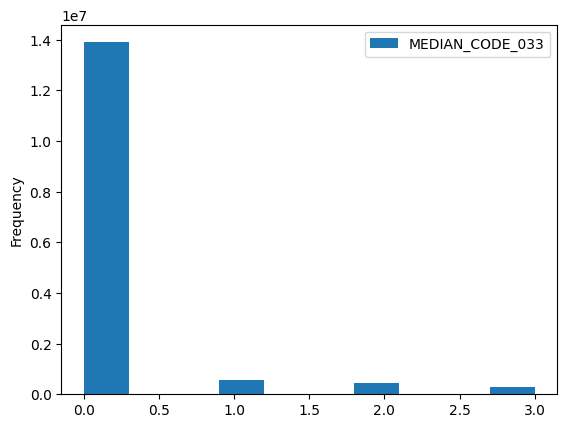

In [46]:
big_data.plot.hist(column= 'MEDIAN_CODE_033');

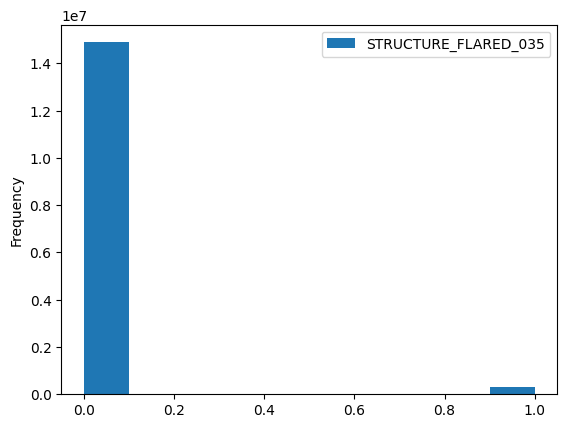

In [47]:
big_data.plot.hist(column= 'STRUCTURE_FLARED_035');

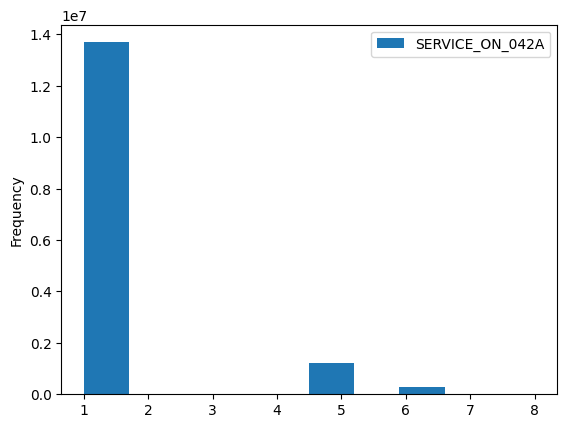

In [49]:
big_data.plot.hist(column= 'SERVICE_ON_042A');

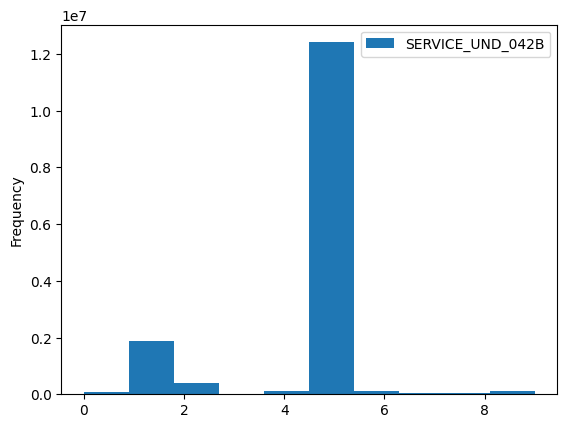

In [50]:
big_data.plot.hist(column= 'SERVICE_UND_042B');

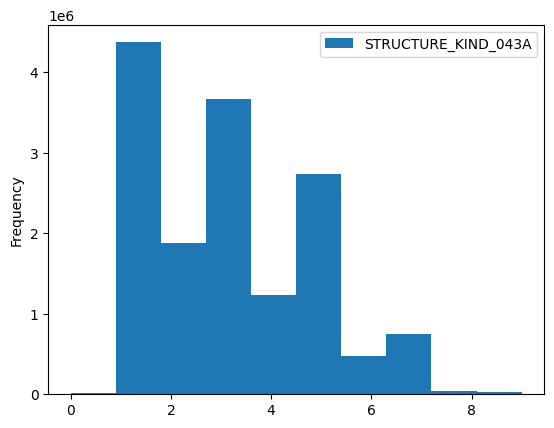

In [51]:
big_data.plot.hist(column= 'STRUCTURE_KIND_043A');

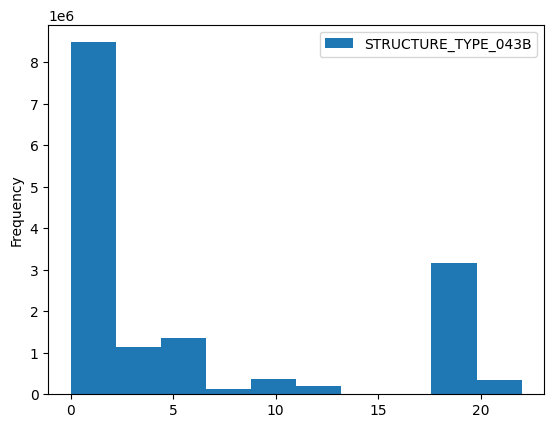

In [52]:
big_data.plot.hist(column= 'STRUCTURE_TYPE_043B');

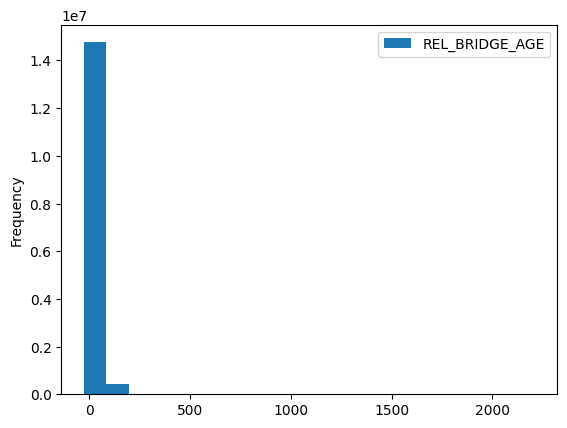

In [95]:
big_data.plot.hist(column= 'REL_BRIDGE_AGE', bins= 20);

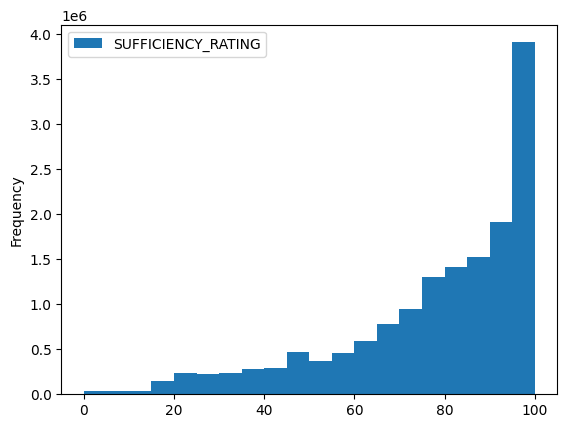

In [54]:
big_data.plot.hist(column= 'SUFFICIENCY_RATING', bins= 20);

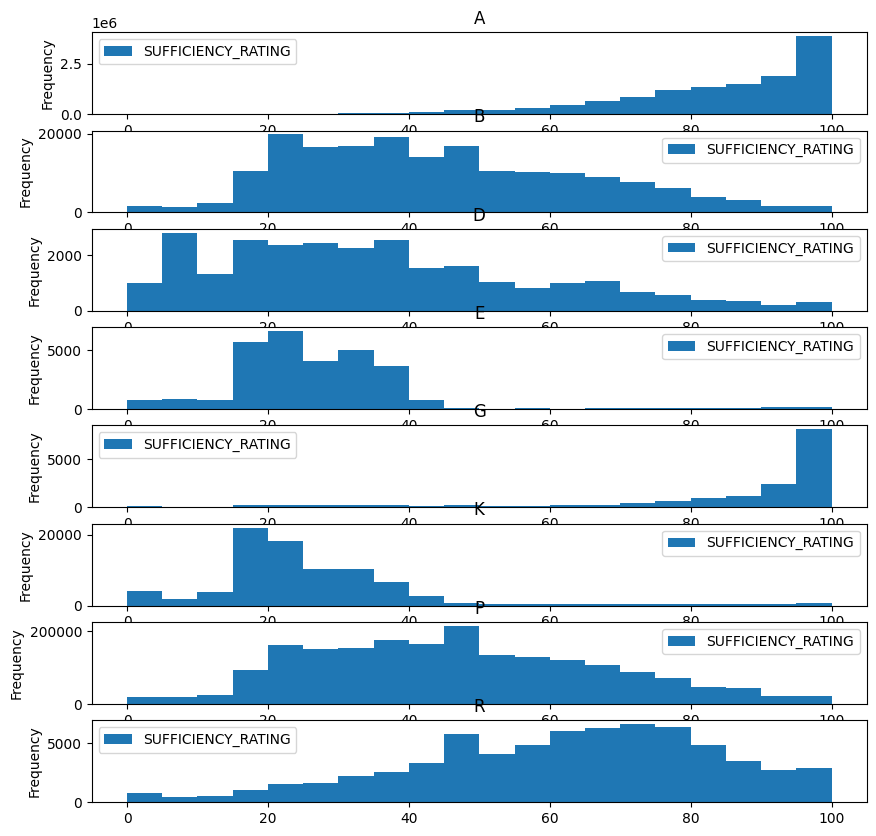

In [57]:
big_data.plot.hist(column= 'SUFFICIENCY_RATING', by= 'OPEN_CLOSED_POSTED_041', bins= 20, figsize= (10, 10));

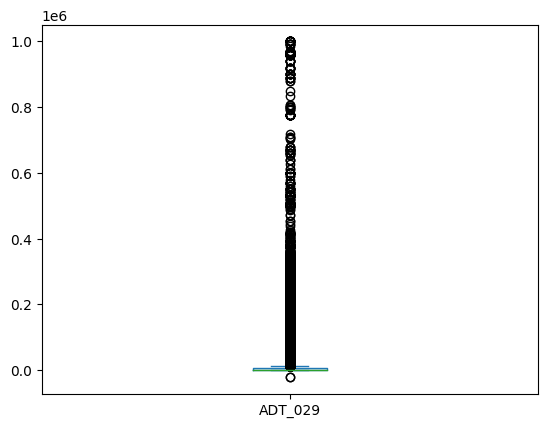

In [58]:
big_data.plot.box(column= 'ADT_029');

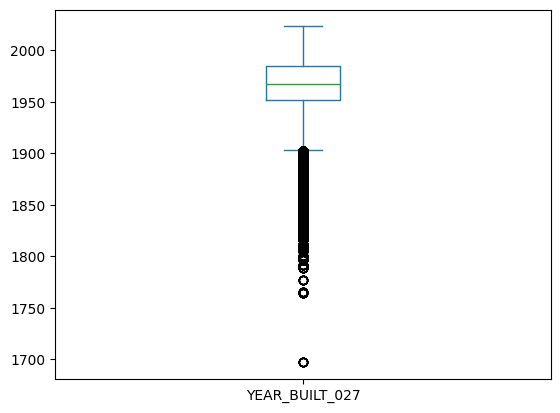

In [82]:
big_data.plot.box(column= 'YEAR_BUILT_027');

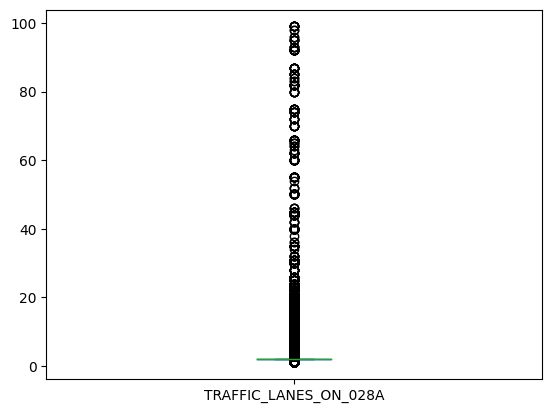

In [84]:
big_data.plot.box(column= 'TRAFFIC_LANES_ON_028A');

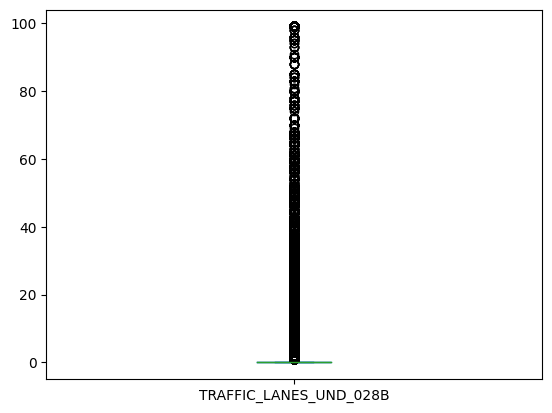

In [85]:
big_data.plot.box(column= 'TRAFFIC_LANES_UND_028B');

In [96]:
# remove ADT_029, YEAR_BUILT_027, TRAFFIC_LANES_ON_028A, TRAFFIC_LANES_UND_028B outliers using quantile approach
cols = ['ADT_029', 'YEAR_BUILT_027', 'TRAFFIC_LANES_ON_028A', 'TRAFFIC_LANES_UND_028B']

Q1 = big_data[cols].quantile(0.25)
Q3 = big_data[cols].quantile(0.75)
IQR = Q3 - Q1

big_data = big_data[~((big_data[cols] < (Q1 - 1.5 * IQR)) |(big_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [97]:
# investigate rel_bridge_age outliers
result = big_data.loc[big_data['REL_BRIDGE_AGE'] > 100]

In [ ]:
result

In [99]:
result2 = result[['REL_BRIDGE_AGE', 'YEAR_BUILT_027', 'YEAR_RECONSTRUCTED_106']]

In [100]:
result2

,REL_BRIDGE_AGE,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106
59943,1906.0,1953,86.0
206479,1402.0,1958,590.0
344154,1214.0,1922,778.0
347699,1001.0,1930,991.0
401670,1928.0,1983,64.0
...,...,...,...
15199259,103.0,1915,0.0
15199303,104.0,1914,0.0
15199305,107.0,1911,0.0
15199321,105.0,1913,0.0


In [108]:
result3 = result2.loc[result2['REL_BRIDGE_AGE'] > 110]

In [109]:
result3

,REL_BRIDGE_AGE,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106
59943,1906.0,1953,86.0
206479,1402.0,1958,590.0
344154,1214.0,1922,778.0
347699,1001.0,1930,991.0
401670,1928.0,1983,64.0
...,...,...,...
15162568,111.0,1907,0.0
15172816,113.0,1905,0.0
15180627,111.0,1907,0.0
15194973,111.0,1907,0.0


In [112]:
result4 = result3.loc[result3['REL_BRIDGE_AGE'] > 115]

In [113]:
result4

,REL_BRIDGE_AGE,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106
59943,1906.0,1953,86.0
206479,1402.0,1958,590.0
344154,1214.0,1922,778.0
347699,1001.0,1930,991.0
401670,1928.0,1983,64.0
...,...,...,...
13501774,2015.0,1968,1.0
14111922,2010.0,1989,7.0
14111923,2016.0,1968,1.0
14722685,2011.0,1989,7.0


In [114]:
result4['REL_BRIDGE_AGE'].value_counts()

REL_BRIDGE_AGE
1996.0    129
1997.0     18
198.0      11
199.0      10
200.0       9
         ... 
1939.0      1
1408.0      1
1912.0      1
1913.0      1
2017.0      1
Name: count, Length: 84, dtype: int64

In [115]:
# filter out bridges with rel_bridge_age over 115 yrs, as these all seem to have bad yr of reconstruction data which made the calculation off
big_data = big_data.loc[big_data['REL_BRIDGE_AGE'] < 115]

In [116]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10208408 entries, 0 to 15201421
Data columns (total 50 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   STATE_CODE_001           int32  
 1   STRUCTURE_NUMBER_008     object 
 2   SERVICE_LEVEL_005C       int32  
 3   DIRECTION_005E           int32  
 4   FUNCTIONAL_CLASS_026     int32  
 5   YEAR_BUILT_027           int32  
 6   TRAFFIC_LANES_ON_028A    int32  
 7   TRAFFIC_LANES_UND_028B   int32  
 8   ADT_029                  float64
 9   MEDIAN_CODE_033          int32  
 10  DEGREES_SKEW_034         float64
 11  STRUCTURE_FLARED_035     int32  
 12  OPEN_CLOSED_POSTED_041   object 
 13  SERVICE_ON_042A          int32  
 14  SERVICE_UND_042B         int32  
 15  STRUCTURE_KIND_043A      int32  
 16  STRUCTURE_TYPE_043B      int32  
 17  APPR_KIND_044A           int32  
 18  APPR_TYPE_044B           int32  
 19  MAIN_UNIT_SPANS_045      float64
 20  APPR_SPANS_046           float64
 21  MAX_SPAN_LE

In [117]:
#save new df as csv, just in case
save_dir = "D:/Scripts/bridges_project/data"
save_name = "masterBridges9.csv"
save_path = os.path.join(save_dir, save_name)
big_data.to_csv(save_path, index= False)